# PART 1 - Performing Sentiment Analysis with Python

In [1]:
# Download appropriate libraries/packages
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read CSV file into a dataframe
url = 'https://raw.githubusercontent.com/codymbaldwin/sample-files/master/theme_park_reviews.csv'
df_reviews = pd.read_csv(url)
df_reviews.head()

,review
0,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1..."


In [3]:
# Generate a sentiment score for each review
analyzer = SentimentIntensityAnalyzer()
df_reviews['Sentiment Scores'] = df_reviews['review'].apply(lambda review: analyzer.polarity_scores(review))
df_reviews.head()

,review,Sentiment Scores
0,If you've ever been to Disneyland anywhere you...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...","{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."


In [4]:
# Extract the compound sentiment score
df_reviews['Compound Score']  = df_reviews['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])
df_reviews.head()

,review,Sentiment Scores,Compound Score
0,If you've ever been to Disneyland anywhere you...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...","{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846


In [5]:
# Export the data back to a CSV file
from google.colab import files
df_reviews.to_csv('reviews_with_sentiment.csv')
files.download('reviews_with_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PART 2 - Creating Word Clouds with Python

In [6]:
# Import additional libraries that are needed
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [7]:
# Join all the review data together into one string
review_text = " ".join(review for review in df_reviews.review)

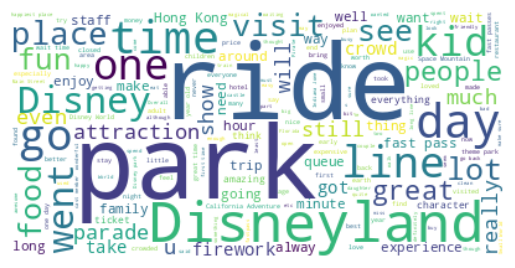

In [8]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["good"])

# Generate a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Create a new dataframe with only the negative reviews
df_reviews_negative = df_reviews[df_reviews['Compound Score'] < 0]
df_reviews_negative.head()

,review,Sentiment Scores,Compound Score
12,"We spend two days, the second day went early t...","{'neg': 0.12, 'neu': 0.856, 'pos': 0.024, 'com...",-0.7789
25,Disneylands the world over are generic apart f...,"{'neg': 0.121, 'neu': 0.774, 'pos': 0.105, 'co...",-0.1779
28,We visited here on a Wednesday. We arrived for...,"{'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...",-0.5574
29,I need to say I have been to home of Disney...,"{'neg': 0.075, 'neu': 0.877, 'pos': 0.049, 'co...",-0.7364
71,During a recent stop over in Hong Kong we paid...,"{'neg': 0.09, 'neu': 0.875, 'pos': 0.035, 'com...",-0.7430


In [10]:
# Join the negative review data together into one string
review_text_negative = " ".join(review for review in df_reviews_negative.review)

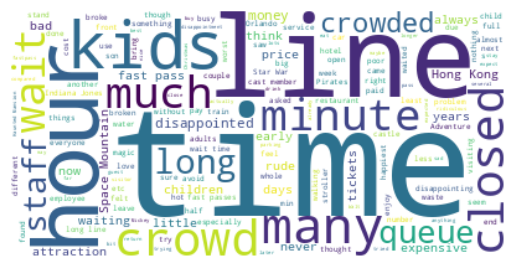

In [11]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["ticket", "parade", "family", "firework", "said", "even", "characters", "people", "quite", "spend", "give", "alot", "earth", "left", "night", "shows", "getting", "Florida", "California", "daughter", "able", "Hong Kong", "tough", "walk", "adult", "worth", "Space Mountain", "theme", "try use", "new", "used", "Hong Kong", "Indiana Jones", "better", "Star War", "fight", "especially" "another", "well", "last", "parks", "fireworks", "used" "feel", "must", "kid", "know", "two", "find", "took", "let", "enough", "HK", "old", "wanted", "spent", "us", "magical", "year old", "want", "year", "said", "make", "make", "said", "photo", "around", "experience", "way", "lot", "area","will", "fun", "food", "great", "made", "character", "small", "u", "every", "Hong Kong", "first", "told", "take", "thing", "trip", "total", "visit", "World", "good", "show", "come", "visited", "everything", "going", "see", "some", "need", "Disneyland", "park", "ride", "went", "really", "say", "Disney", "still", "go", "place", "really", "got", "say", "back", "day", "rides", "one"])

# Generate a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_text_negative)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()